## **ПЗ №3. Решение нелинейных уравнений. Метод хорд. Теоремы об отделении корней.**

* ### Реализовать метод хорд.
* ### Запрограммировать теоремы об отделении корней. Применить запрограммированные теоремы совместно с численными методами решения нелинейных уравнений.

In [5]:
import math
import matplotlib.pyplot as plt


# Класс, который будет решать нелинейные уравнения - решатель
class RootSolver:
    def __init__(self, f, epsilon=1e-6, max_iter=1000):
        self.f = f                  # Функция f - мы ищем ее корни
        self.epsilon = epsilon      # Точность
        self.max_iter = max_iter    # Макс число итераций
        
    # Функция реализации Метода хорж
    def chord_method(self, a, b):
        if self.f(a) * self.f(b) > 0: # a, b - границы интервала, содержащего корень
            raise ValueError("У функции должны быть разные знаки на границах интервала")
        
        # Берем x_предыдущий за первую границу интервала, x - за вторую границу
        iterations = 0
        x_prev = a
        x = b
        
        while True:
            # Высчитываем x_следующий на основе x_prev и x
            x_next = x - (self.f(x) * (x - x_prev)) / (self.f(x) - self.f(x_prev))
            iterations += 1
            
            # Условие завершения прохрждения по интервалу
            if abs(x_next - x) < self.epsilon or iterations >= self.max_iter:
                break
             
            # Берем x_предыдущий за вторую границу интервала, x - за x_следующий
            x_prev = x
            x = x_next
        
        return x, iterations
    
    # Функция для отделения корней - находит интервалы, где есть корни
    def separate_roots(self, a, b, h):
        intervals = []             # Сюда будем складывать найденные интервалы
        x1 = a                     # Начинаем с левой границы
        x2 = x1 + h                # Правая граница первого подынтервала
        y1 = self.f(x1)            # Значение функции в левой границе
        
        while x2 <= b:             # Пока не дойдем до конца основного интервала
            y2 = self.f(x2)        # Значение функции в правой границе
            
            # Если знаки разные - значит здесь есть корень
            if y1 * y2 <= 0:
                intervals.append((x1, x2)) # Добавляем интервал в список
            
            # Сдвигаемся на шаг h вправо
            x1 = x2
            x2 = x1 + h
            y1 = y2
        
        return intervals
    
    # Функция для рисования графика функции
    def plot_function(self, a, b, points=1000):
        x_values = [a + i*(b-a)/points for i in range(points+1)]  # Генерируем точки по X
        y_values = [self.f(x) for x in x_values]                  # Считаем значения функции
        
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, y_values, label='f(x)')
        plt.axhline(0, color='black', linewidth=0.5)
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('График функции')
        plt.grid(True)
        plt.legend()
        plt.show()

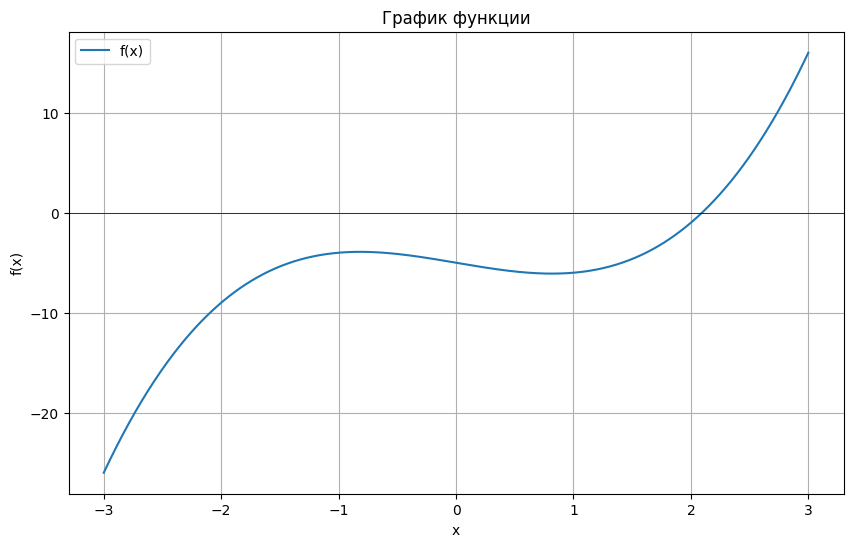

Интервалы, содержащие корни:
1. [2.00, 2.50]

Уточнение корней методом хорд:
Корень на интервале [2.00, 2.50]: 2.09455148, итераций: 6


In [6]:
# Пример использования решателя
if __name__ == "__main__":
    # Определяем функцию, корни которой ищем
    def f(x):
        return x**3 - 2*x - 5
    
    # Создаем экземпляр решателя
    solver = RootSolver(f, epsilon=1e-8)
    
    # Рисуем график, чтобы визуально найти корни
    solver.plot_function(-3, 3)
    
    # Ищем интервалы, где есть корни (знаки функции разные)
    intervals = solver.separate_roots(-3, 3, 0.5)
    print("Интервалы, содержащие корни:")
    for i, (a, b) in enumerate(intervals, 1):
        print(f"{i}. [{a:.2f}, {b:.2f}]")
    
    # Уточняем корни методом хорд на найденных интервалах
    print("\nУточнение корней методом хорд:")
    for a, b in intervals:
        root, iterations = solver.chord_method(a, b)
        print(f"Корень на интервале [{a:.2f}, {b:.2f}]: {root:.8f}, итераций: {iterations}")

## **ПЗ №4. Решение систем линейных алгебраических уравнений (СЛАУ).**
* ### Написать программу на Python, реализующую метод Гаусса (метод единственного деления).
* ### Реализовать метод Гаусса с использованием метода выбора ведущего элемента по столбцам.
* ### Написать программу для метода Гаусса с использованием метода исключений (правило прямоугольника).
* ### Запрограммировать метод решения СЛАУ с использованием LU-разложения.


In [7]:
import numpy as np
from copy import deepcopy


class GaussSolver:
    def __init__(self, A, b):
        self.A = deepcopy(A)  # Матрица коэффицентов (чтоб не портить исходную)
        self.b = deepcopy(b)  # Вектор свободных членов
        self.n = len(b)       # Размерность системы
    
    # 1 Метод Гаусса (обычный, без выбора ведущего)
    def gauss_elimination(self):
        A, b = self.A, self.b
        
        # Прямой ход - приводим к треугольному виду
        for k in range(self.n-1):
            # Тут может быть проблема, если диагональный элемент нулевой...
            for i in range(k+1, self.n):
                factor = A[i][k] / A[k][k]  # Наш "магический" множитель
                for j in range(k, self.n):
                    A[i][j] -= factor * A[k][j]
                b[i] -= factor * b[k]
        
        # Обратный ход - находим решения
        x = [0] * self.n
        for i in range(self.n-1, -1, -1):
            x[i] = b[i]
            for j in range(i+1, self.n):
                x[i] -= A[i][j] * x[j]
            x[i] /= A[i][i]
        
        return x

    # 2 Метод Гаусса с выбором ведущего по столбцам
    def gauss_pivoting(self):
        A, b = self.A, self.b
        x = [0] * self.n
        order = list(range(self.n))  # Для учёта перестановок строк
        
        # Прямой ход с выбором ведущего
        for k in range(self.n-1):
            # Ищем максимальный элемент в столбце
            max_row = k
            for i in range(k+1, self.n):
                if abs(A[i][k]) > abs(A[max_row][k]):
                    max_row = i
            
            # Меняем строки местами (если надо)
            if max_row != k:
                A[k], A[max_row] = A[max_row], A[k]
                b[k], b[max_row] = b[max_row], b[k]
                order[k], order[max_row] = order[max_row], order[k]
            
            # Ну а дальше как в обычном Гауссе
            for i in range(k+1, self.n):
                factor = A[i][k] / A[k][k]
                for j in range(k, self.n):
                    A[i][j] -= factor * A[k][j]
                b[i] -= factor * b[k]
        
        # Обратный ход
        for i in range(self.n-1, -1, -1):
            x[i] = b[i]
            for j in range(i+1, self.n):
                x[i] -= A[i][j] * x[j]
            x[i] /= A[i][i]
        
        return x

    # 3 Метод Гаусса с правилом прямоугольника (для ленточных матриц)
    def gauss_rectangle_rule(self):
        A, b = self.A, self.b
        
        for k in range(self.n-1):
            for i in range(k+1, self.n):
                # Правило прямоугольника - используем только близкие элементы
                if A[i][k] != 0:
                    factor = A[i][k] / A[k][k]
                    for j in range(k, min(k+3, self.n)):  # Ограничиваем ширину ленты
                        A[i][j] -= factor * A[k][j]
                    b[i] -= factor * b[k]
        
        # Обратный ход как обычно
        x = [0] * self.n
        for i in range(self.n-1, -1, -1):
            x[i] = b[i]
            for j in range(i+1, min(i+3, self.n)):  # Тоже учитываем ленту
                x[i] -= A[i][j] * x[j]
            x[i] /= A[i][i]
        
        return x

    # 4 LU-разложение и решение СЛАУ
    def lu_decomposition(self):
        A = self.A
        n = self.n
        L = [[0]*n for _ in range(n)]
        U = [[0]*n for _ in range(n)]
        
        # Разложение A = L*U
        for i in range(n):
            # Верхняя треугольная матрица U
            for k in range(i, n):
                sum_ = sum(L[i][j] * U[j][k] for j in range(i))
                U[i][k] = A[i][k] - sum_
            
            # Нижняя треугольная матрица L
            for k in range(i, n):
                if i == k:
                    L[i][i] = 1  # Диагональ единичная
                else:
                    sum_ = sum(L[k][j] * U[j][i] for j in range(i))
                    L[k][i] = (A[k][i] - sum_) / U[i][i]
        
        # Решаем Ly = b
        y = [0]*n
        for i in range(n):
            y[i] = self.b[i] - sum(L[i][j]*y[j] for j in range(i))
        
        # Решаем Ux = y
        x = [0]*n
        for i in range(n-1, -1, -1):
            x[i] = (y[i] - sum(U[i][j]*x[j] for j in range(i+1, n))) / U[i][i]
        
        return x

In [8]:
# Пример использования (с проверкой на правильность)
if __name__ == "__main__":
    # Тестовая СЛАУ
    A = [
        [2,  -1,  3],
        [4,  2,  5],
        [1,  2,  0]
    ]
    b = [1, 4, 7]
    
    print("Исходная матрица A:")
    
    for row in A:
        print(row)
    print("Вектор b:", b)
    
    solver = GaussSolver(A, b)
    
    print("\n1. Решение методом Гаусса (без выбора ведущего):")
    x1 = solver.gauss_elimination()
    print("x =", x1)
    
    print("\n2. Решение с выбором ведущего по столбцам:")
    x2 = solver.gauss_pivoting()
    print("x =", x2)
    
    print("\n3. Решение с правилом прямоугольника (для ленточных матриц):")
    x3 = solver.gauss_rectangle_rule()
    print("x =", x3)
    
    print("\n4. Решение через LU-разложение:")
    x4 = solver.lu_decomposition()
    print("x =", x4)
    
    # Проверка с помощью нампая (для теста)
    print("\nПроверка через numpy.linalg.solve:")
    x_np = np.linalg.solve(np.array(A), np.array(b))
    print("x =", x_np)

Исходная матрица A:
[2, -1, 3]
[4, 2, 5]
[1, 2, 0]
Вектор b: [1, 4, 7]

1. Решение методом Гаусса (без выбора ведущего):
x = [9.0, -1.0, -6.0]

2. Решение с выбором ведущего по столбцам:
x = [9.0, -1.0, -6.0]

3. Решение с правилом прямоугольника (для ленточных матриц):
x = [9.0, -1.0, -6.0]

4. Решение через LU-разложение:
x = [9.0, -1.0, -6.0]

Проверка через numpy.linalg.solve:
x = [ 9. -1. -6.]


## **ПЗ №5. Решение систем линейных алгебраических уравнений (СЛАУ)-2.**
* ### Написать программу на Python, реализующую метод простых итераций для решения СЛАУ.
* ### Реализовать метод Зейделя для решения СЛАУ. Протестировать на примере из лекции.

In [9]:
import numpy as np
from copy import deepcopy


class IterativeSolver:
    def __init__(self, A, b, eps=1e-6, max_iter=1000):
        self.A = deepcopy(A)  # Матрица коэффициентов (чтоб не испортить исходную)
        self.b = deepcopy(b)  # Вектор правой части
        self.eps = eps        # Точность
        self.max_iter = max_iter  # Макс число итераций
        self.n = len(b)       # Размерность системы
        
    # 1 Метод простых итераций (Якоби)
    def jacobi_method(self):
        x = np.zeros(self.n)  # Начальное приближение - нули
        x_new = np.zeros(self.n)
        iterations = 0
        
        # Главный итерационный процесс
        while True:
            for i in range(self.n):
                # Суммируем вклады всех компонент, кроме текущей
                sigma = 0
                for j in range(self.n):
                    if j != i:
                        sigma += self.A[i][j] * x[j]
                # Новая компонента решения
                x_new[i] = (self.b[i] - sigma) / self.A[i][i]
            
            # Проверяем условие остановки
            iterations += 1
            if np.linalg.norm(x_new - x) < self.eps or iterations >= self.max_iter:
                break
                
            x = x_new.copy()  # Обновляем решение
        
        return x_new, iterations
    
    # 2 Метод Зейделя (улучшенная версия Якоби)
    def seidel_method(self):
        x = np.zeros(self.n)  # Начальное приближение
        iterations = 0
        
        while True:
            x_new = x.copy()  # Копируем текущее решение
            max_diff = 0      # Для отслеживания изменения
            
            for i in range(self.n):
                # Сумма "левых" (уже обновленных) и "правых" (еще старых) компонент
                sigma1 = sum(self.A[i][j] * x_new[j] for j in range(i))
                sigma2 = sum(self.A[i][j] * x[j] for j in range(i+1, self.n))
                
                # Обновляем компоненту решения
                x_new[i] = (self.b[i] - sigma1 - sigma2) / self.A[i][i]
                
                # Следим за максимальным изменением
                diff = abs(x_new[i] - x[i])
                if diff > max_diff:
                    max_diff = diff
            
            iterations += 1
            # Условие выхода (либо точность достигнута, либо превышено число итераций)
            if max_diff < self.eps or iterations >= self.max_iter:
                break
                
            x = x_new.copy()  # Обновляем решение
        
        return x_new, iterations


# Тестирование на примере из лекции (примерно как в пособии)
if __name__ == "__main__":
    # Пример из лекции (должен сходиться)
    A = [
        [10, -1, 2, 0],
        [-1, 11, -1, 3],
        [2, -1, 10, -1],
        [0, 3, -1, 8]
    ]
    b = [6, 25, -11, 15]
    
    print("Тестовая матрица A:")
    
    for row in A:
        print(row)
    print("Вектор b:", b)
    
    solver = IterativeSolver(A, b, eps=1e-6)
    
    print("\n1. Метод простых итераций (Якоби):")
    x_jacobi, iter_j = solver.jacobi_method()
    print(f"Решение: {x_jacobi}")
    print(f"Достигнуто за {iter_j} итераций")
    
    print("\n2. Метод Зейделя:")
    x_seidel, iter_s = solver.seidel_method()
    print(f"Решение: {x_seidel}")
    print(f"Достигнуто за {iter_s} итераций")
    
    # Проверка с numpy (для верификации)
    print("\nПроверка через numpy.linalg.solve:")
    x_np = np.linalg.solve(np.array(A), np.array(b))
    print("Точное решение:", x_np)
    
    # Сравнение ошибок
    error_j = np.linalg.norm(x_jacobi - x_np)
    error_s = np.linalg.norm(x_seidel - x_np)
    print(f"\nОшибка метода Якоби: {error_j:.2e}")
    print(f"Ошибка метода Зейделя: {error_s:.2e}")

Тестовая матрица A:
[10, -1, 2, 0]
[-1, 11, -1, 3]
[2, -1, 10, -1]
[0, 3, -1, 8]
Вектор b: [6, 25, -11, 15]

1. Метод простых итераций (Якоби):
Решение: [ 0.99999994  2.0000001  -1.00000008  1.00000011]
Достигнуто за 19 итераций

2. Метод Зейделя:
Решение: [ 1.00000004  1.99999999 -1.00000001  1.        ]
Достигнуто за 8 итераций

Проверка через numpy.linalg.solve:
Точное решение: [ 1.  2. -1.  1.]

Ошибка метода Якоби: 1.78e-07
Ошибка метода Зейделя: 4.64e-08


## **ПЗ №6**
* ### Запрограммировать метод непосредственного развёртывания для нахождения собственных значений и собственных векторов. 
* ### Написать программу, реализующую метод итераций (степенной метод) 
 

In [10]:
import numpy as np
from copy import deepcopy


class EigenSolver:
    def __init__(self, A, eps=1e-6, max_iter=1000):
        self.A = deepcopy(A)  # Исходная матрица (чтоб не испортить)
        self.eps = eps        # Точность вычислений
        self.max_iter = max_iter  # Макс число итераций
        self.n = len(A)       # Размер матрицы

    # 1 Метод непосредственного развертывания (для небольших матриц)
    def direct_expansion(self):
        # Находим характеристический многочлен
        coeffs = np.poly(self.A)  # Коэффициенты многочлена
        
        # Корни многочлена = собственные значения
        eigenvalues = np.roots(coeffs)
        
        # Находим собственные векторы для каждого значения
        eigenvectors = []
        for lam in eigenvalues:
            # Решаем (A - λI)x = 0
            B = self.A - lam * np.eye(self.n)
            # Ищем нетривиальное решение
            _, _, vh = np.linalg.svd(B)
            eigenvector = vh[-1]  # Последняя строка V* соответствует мин сингулярному значению
            eigenvectors.append(eigenvector)
        
        return eigenvalues, eigenvectors

    # 2 Степенной метод (итерационный, для наибольшего по модулю собств. значения)
    def power_iteration(self):
        # Начальное приближение - случайный вектор
        x = np.random.rand(self.n)
        x = x / np.linalg.norm(x)  # Нормируем
        
        lambda_prev = 0  # Предыдущее приближение
        iterations = 0
        
        while True:
            # Умножаем матрицу на вектор
            x_new = self.A @ x
            
            # Новое приближение собственного значения (отношение Рэлея)
            lambda_new = (x_new @ x) / (x @ x)
            
            # Нормируем вектор
            x_new = x_new / np.linalg.norm(x_new)
            
            iterations += 1
            # Проверяем сходимость
            if abs(lambda_new - lambda_prev) < self.eps or iterations >= self.max_iter:
                break
                
            x = x_new
            lambda_prev = lambda_new
        
        # Возвращаем собственное значение и вектор
        return lambda_new, x_new, iterations


# Тестирование методов
if __name__ == "__main__":
    # Тестовая матрица (из примера)
    A = np.array([
        [4, -1, 0],
        [-1, 4, -1],
        [0, -1, 4]
    ])
    
    print("Тестовая матрица A:")
    print(A)
    
    solver = EigenSolver(A, eps=1e-8)
    
    print("\n1. Метод непосредственного развертывания:")
    lambdas, vectors = solver.direct_expansion()
    print("Собственные значения:", lambdas)
    print("Собственные векторы:")
    for v in vectors:
        print(v)
    
    print("\n2. Степенной метод (максимальное по модулю собственное значение):")
    lambda_power, v_power, iter_p = solver.power_iteration()
    print(f"Наибольшее собственное значение: {lambda_power:.6f}")
    print("Соответствующий собственный вектор:", v_power)
    print(f"Достигнуто за {iter_p} итераций")
    
    # Проверка через нампай
    print("\nПроверка через numpy.linalg.eig:")
    lambdas_np, vectors_np = np.linalg.eig(A)
    print("Собственные значения numpy:", lambdas_np)
    print("Собственные векторы numpy:")
    print(vectors_np)

Тестовая матрица A:
[[ 4 -1  0]
 [-1  4 -1]
 [ 0 -1  4]]

1. Метод непосредственного развертывания:
Собственные значения: [5.41421356 4.         2.58578644]
Собственные векторы:
[ 0.5        -0.70710678  0.5       ]
[ 7.07106781e-01 -3.25857078e-17 -7.07106781e-01]
[0.5        0.70710678 0.5       ]

2. Степенной метод (максимальное по модулю собственное значение):
Наибольшее собственное значение: 5.414214
Соответствующий собственный вектор: [ 0.49995315 -0.70710678  0.50004685]
Достигнуто за 31 итераций

Проверка через numpy.linalg.eig:
Собственные значения numpy: [2.58578644 4.         5.41421356]
Собственные векторы numpy:
[[ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  1.37464400e-16 -7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01  5.00000000e-01]]


## **ПЗ №7**
* ### Запрограммировать метод вращений для нахождения собственных значений и собственных векторов для матриц 2 x 2.
* ### Запрограммировать метод вращений для матриц n x n.

In [11]:
import numpy as np
from copy import deepcopy


class JacobiEigenSolver:
    def __init__(self, A, eps=1e-8, max_iter=1000):
        self.A = deepcopy(A)  # Исходная матрица
        self.eps = eps        # Точность
        self.max_iter = max_iter  # Макс итераций
        self.n = len(A)       # Размер матрицы
    
    # Метод вращений для матрицы 2×2 (точное решение)
    def jacobi_2x2(self):
        if self.n != 2:
            raise ValueError("Метод только для 2×2 матриц!")
        
        a, b, c, d = self.A[0,0], self.A[0,1], self.A[1,0], self.A[1,1]
        
        # Вычисляем угол поворота (можно через арктангенс)
        if b == c:
            theta = np.pi/4  # Если внедиагональные элементы равны
        else:
            theta = 0.5 * np.arctan(2*(b)/(a-d)) if (a-d) != 0 else np.pi/4
        
        # Матрица вращения
        c_theta, s_theta = np.cos(theta), np.sin(theta)
        Q = np.array([[c_theta, -s_theta],
                      [s_theta, c_theta]])
        
        # Диагональная матрица (собственные значения)
        D = Q.T @ self.A @ Q
        
        # Собственные значения на диагонали
        eigvals = np.array([D[0,0], D[1,1]])
        
        # Собственные векторы - столбцы Q
        eigvecs = Q
        
        return eigvals, eigvecs
    
    # Общий метод Якоби для n×n матриц
    def jacobi_nxn(self):
        A = self.A.copy()
        n = self.n
        Q = np.eye(n)  # Матрица вращений (в начале единичная)
        iterations = 0
        
        while True:
            # Находим максимальный внедиагональный элемент
            max_val = 0
            p, q = 0, 0
            for i in range(n):
                for j in range(i+1, n):
                    if abs(A[i,j]) > max_val:
                        max_val = abs(A[i,j])
                        p, q = i, j
            
            # Проверка на выход
            if max_val < self.eps or iterations >= self.max_iter:
                break
            
            # Вычисляем угол поворота
            if A[p,p] == A[q,q]:
                theta = np.pi/4
            else:
                theta = 0.5 * np.arctan(2*A[p,q]/(A[p,p]-A[q,q]))
            
            c, s = np.cos(theta), np.sin(theta)
            
            # Создаем матрицу вращения J
            J = np.eye(n)
            J[p,p] = c
            J[p,q] = -s
            J[q,p] = s
            J[q,q] = c
            
            # Применяем вращение: A = J^T * A * J
            A = J.T @ A @ J
            
            # Аккумулируем вращения: Q = Q * J
            Q = Q @ J
            
            iterations += 1
        
        # Собственные значения на диагонали A
        eigvals = np.diag(A)
        
        # Собственные векторы - столбцы Q
        eigvecs = Q
        
        return eigvals, eigvecs, iterations


# Тестирование
if __name__ == "__main__":
    print("1. Тест для матрицы 2×2:")
    A_2x2 = np.array([[4, -1],
                      [-1, 3]], dtype=float)
    
    solver_2x2 = JacobiEigenSolver(A_2x2)
    eigvals_2x2, eigvecs_2x2 = solver_2x2.jacobi_2x2()
    
    print("Исходная матрица:")
    print(A_2x2)
    print("\nСобственные значения:", eigvals_2x2)
    print("Собственные векторы:")
    print(eigvecs_2x2)
    
    print("\n2. Тест для матрицы n×n:")
    A_nxn = np.array([[4, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 4]], dtype=float)
    
    solver_nxn = JacobiEigenSolver(A_nxn)
    eigvals_nxn, eigvecs_nxn, iters = solver_nxn.jacobi_nxn()
    
    print("Исходная матрица:")
    print(A_nxn)
    print(f"\nСобственные значения (за {iters} итераций):", eigvals_nxn)
    print("Собственные векторы:")
    print(eigvecs_nxn)
    
    # Проверка через numpy
    print("\nПроверка через numpy.linalg.eig:")
    np_eigvals, np_eigvecs = np.linalg.eig(A_nxn)
    print("Собственные значения numpy:", np_eigvals)
    print("Собственные векторы numpy:")
    print(np_eigvecs)

1. Тест для матрицы 2×2:
Исходная матрица:
[[ 4. -1.]
 [-1.  3.]]

Собственные значения: [2.5 4.5]
Собственные векторы:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

2. Тест для матрицы n×n:
Исходная матрица:
[[ 4. -1.  0.]
 [-1.  4. -1.]
 [ 0. -1.  4.]]

Собственные значения (за 9 итераций): [2.58578644 5.41421356 4.        ]
Собственные векторы:
[[ 5.00000000e-01 -5.00000000e-01 -7.07106781e-01]
 [ 7.07106781e-01  7.07106781e-01 -2.60637658e-16]
 [ 5.00000000e-01 -5.00000000e-01  7.07106781e-01]]

Проверка через numpy.linalg.eig:
Собственные значения numpy: [2.58578644 4.         5.41421356]
Собственные векторы numpy:
[[ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [ 7.07106781e-01  1.37464400e-16 -7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01  5.00000000e-01]]
